# Flight Price Prediction

In [1]:
# Importing libraries required for EDA and Model Building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset

data = pd.read_excel(r"Flight_data.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Checking for NaN values and dealing with them 

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
# Since there is only one record with NaN Value, we drop it.

data.dropna(inplace = True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

In [8]:
# There are lots of object type features in the dataset. Lets deal with each one of them.

In [9]:
# 1. Date_of_Journey

data['Journey_day'] = pd.to_datetime(data['Date_of_Journey'],format = '%d/%m/%Y').dt.day
data['Journey_month'] = pd.to_datetime(data['Date_of_Journey'],format = '%d/%m/%Y').dt.month

# We can skip year as its least significant(constant feature) in Flight Price Prediction
# Now we can drop Date_of _Journey as we have already dealt with it above.
data.drop('Date_of_Journey',axis = 1,inplace = True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
# 2. Dep_Time

data['Departure_hour'] = pd.to_datetime(data.Dep_Time).dt.hour
data['Departure_min'] = pd.to_datetime(data.Dep_Time).dt.minute

# Now we can drop Dep_Time as we have already dealt with it above.
data.drop('Dep_Time',axis = 1,inplace = True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [11]:
# 3. Arrival_Time

data['Arrival_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min'] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as we have already dealt with it above.
data.drop('Arrival_Time',axis = 1,inplace = True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
# 4. Duration

dur = list(data.Duration)

# Since duration doesn't have uniform data, below code is used to make it uniform so as to split it easily.

for i in range(len(dur)):
    if len(dur[i].split())!=2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"
        else:
            dur[i] = "0h " + dur[i]
            
duration_hours = []
duration_mins = []

for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))

data['Duration_hours'] = duration_hours 
data['Duration_mins'] = duration_mins
data.drop('Duration',axis=1,inplace = True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [13]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
# 5. Route

# Route can be dropped since Total_Stops gives us an idea whether its a direct flight or it has some stops in between.

data.drop('Route',axis = 1,inplace = True)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


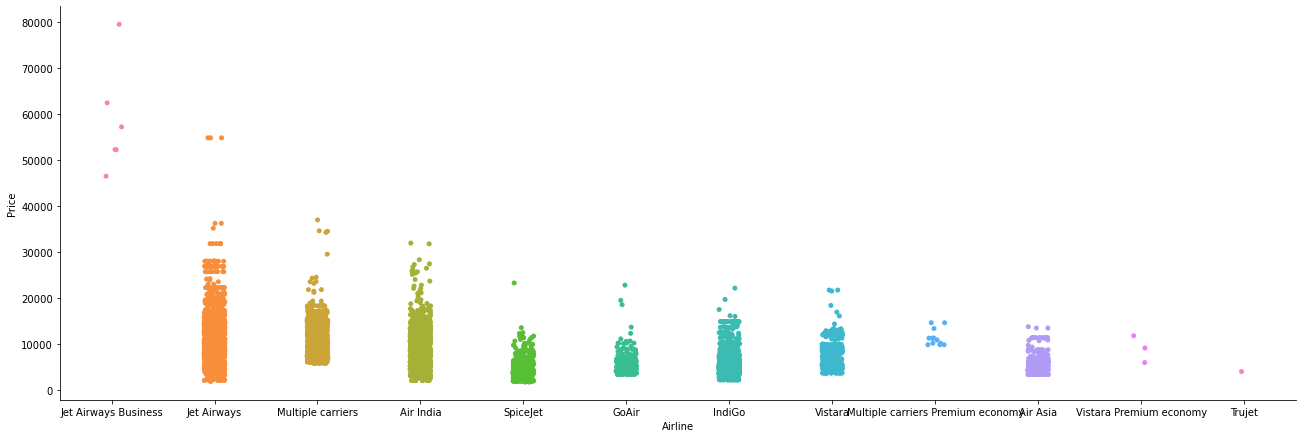

In [15]:
# 6. Airline (Categorical Data)

sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="strip", height = 6, aspect = 3)
plt.show()

In [16]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [17]:
# Since Price is more or less same wrt Airline, we can use OneHotEncoding to encode it.

airlines = pd.get_dummies(data[['Airline']],drop_first = True)
airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


C:\Users\tom97\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tom97\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.9% of the points

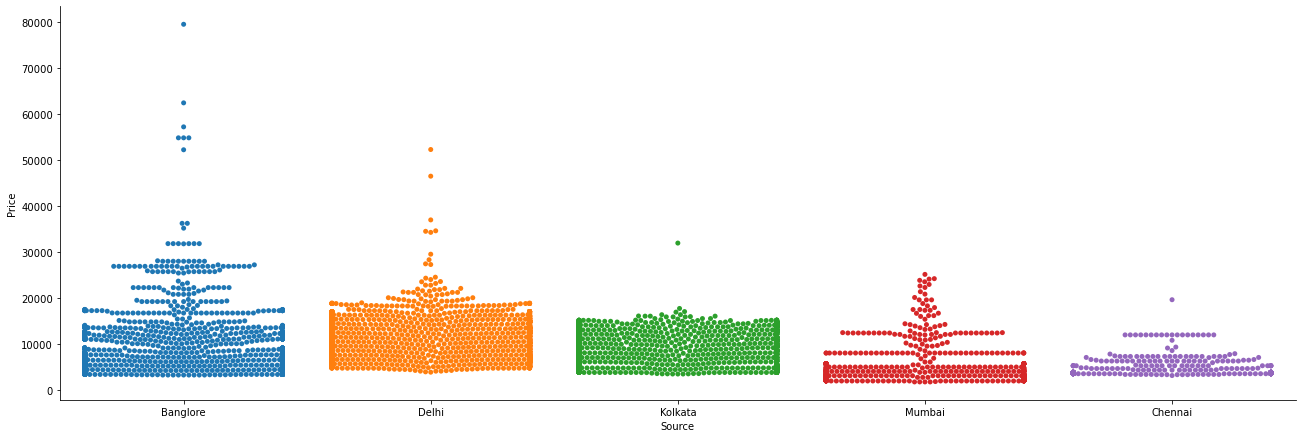

In [18]:
# 7. Source

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="swarm", height = 6, aspect = 3)
plt.show()


In [19]:
# Since Price is more or less same wrt Source, we can use OneHotEncoding to encode it.

sources = pd.get_dummies(data[['Source']],drop_first = True)
sources.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


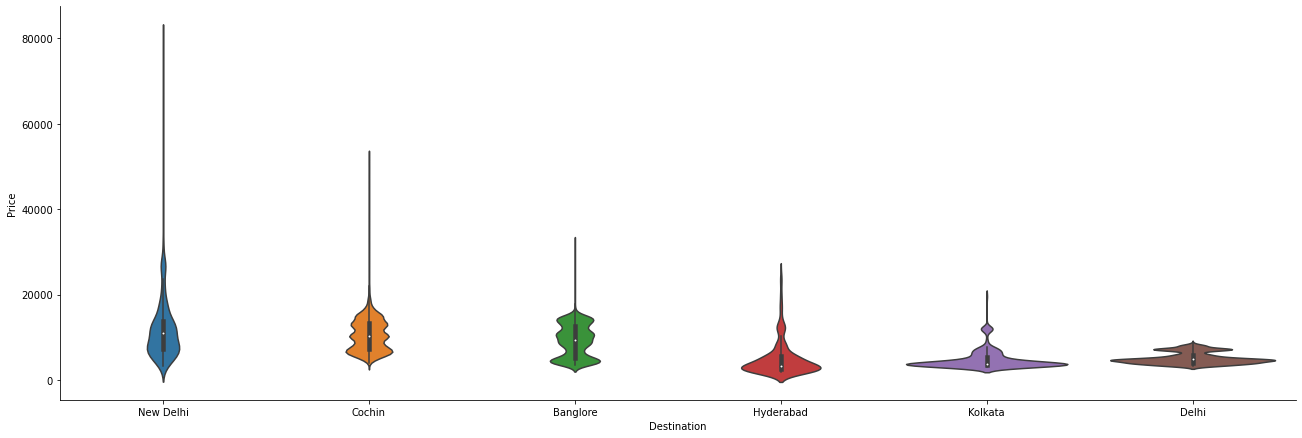

In [20]:
# 8. Destination

sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="violin", height = 6, aspect = 3)
plt.show()

In [21]:
# Since Price is more or less same wrt Destination as well, we can use OneHotEncoding to encode it.

destinations = pd.get_dummies(data[['Destination']],drop_first = True)
destinations.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [22]:
# 9. Total_Stops

data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

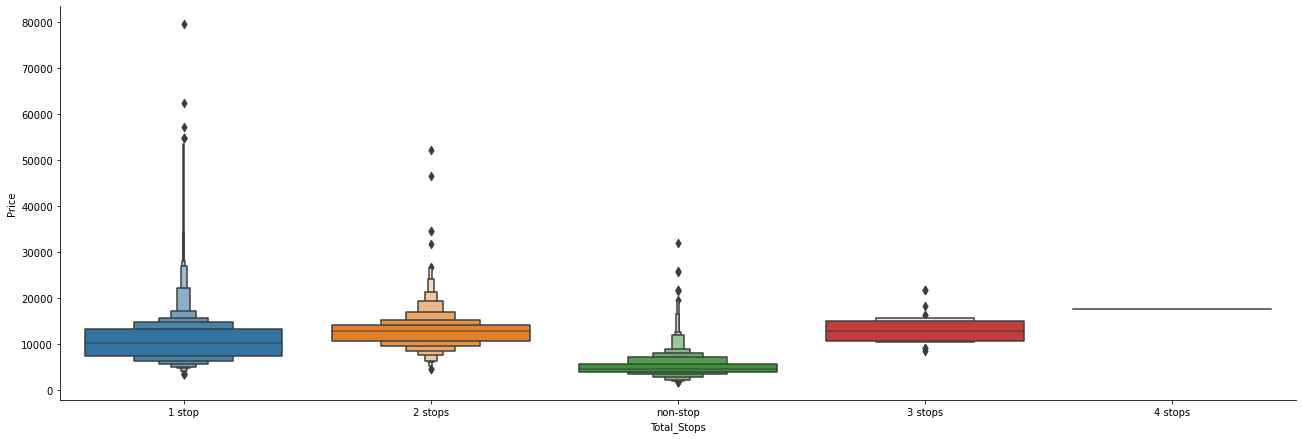

In [23]:
sns.catplot(y = "Price", x = "Total_Stops", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [24]:
# We can see more the no. of stops, higher is the price.Hence, we can label encode

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data = pd.concat([data,airlines,sources,destinations],axis = 1)
data.drop(['Airline','Source','Destination'],axis = 1,inplace = True)
data

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,No info,4107,9,4,19,55,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,No info,4145,27,4,20,45,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,No info,7229,27,4,8,20,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,No info,12648,1,3,11,30,14,10,2,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# 10. Additional_Info

data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [26]:
8344/10682

0.781127129750983

In [27]:
# Since Additional_Info has 80% data as No info,so we drop it

data.drop('Additional_Info',axis = 1,inplace = True)
data

,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [28]:
data.shape

(10682, 30)

## Feature Selection

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Price',axis = 1),data.Price,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7477, 29), (3205, 29), (7477,), (3205,))

In [30]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train,Y_train)
mutual_info

array([0.77500667, 0.20353004, 0.5826751 , 0.32516691, 0.2448119 ,
       0.36979503, 0.33396522, 0.45336124, 0.32173491, 0.27602961,
       0.04840655, 0.33998488, 0.53307906, 0.00869454, 0.24270968,
       0.        , 0.19883014, 0.        , 0.13726013, 0.00379626,
       0.13468018, 0.51054532, 0.44805707, 0.20227406, 0.49681802,
       0.31778041, 0.20246927, 0.13336212, 0.15798078])

<AxesSubplot:>

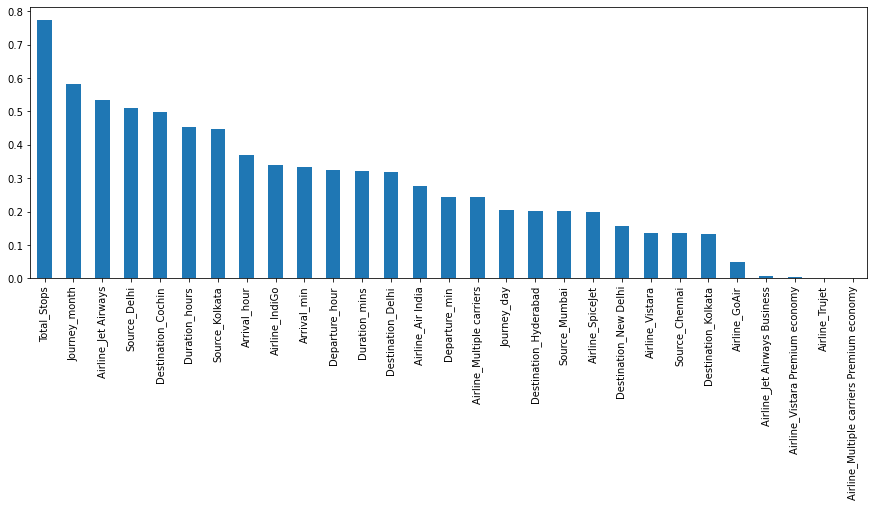

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [32]:
from sklearn.feature_selection import SelectKBest

b_twenty = SelectKBest(mutual_info_regression,k=20)
b_twenty.fit(X_train,Y_train)
new_features=X_train.columns[b_twenty.get_support()]
new_features

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Departure_hour',
       'Departure_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad'],
      dtype='object')

In [33]:
X_train = X_train[new_features]
X_test = X_test[new_features]

## Training the model

In [34]:
from sklearn.ensemble import RandomForestRegressor
rff = RandomForestRegressor()
rff.fit(X_train, Y_train)

predictions = rff.predict(X_test)

rff.score(X_train, Y_train)

0.95459819320318

In [35]:
rff.score(X_test, Y_test)

0.7616630452922294

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

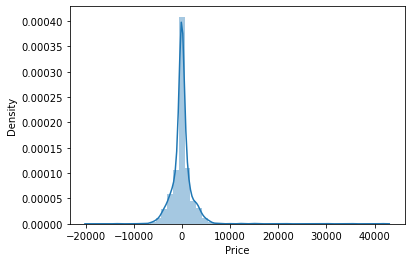

In [36]:
sns.distplot(Y_test-predictions)

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predictions')

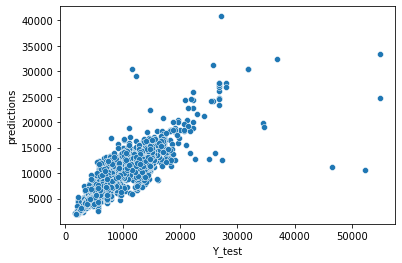

In [37]:
fig =sns.scatterplot(Y_test, predictions)
fig.set_xlabel("Y_test")
fig.set_ylabel("predictions")

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1250.3289822084225
MSE: 5145686.744532771
RMSE: 2268.410620794386


In [39]:
metrics.r2_score(Y_test, predictions)

0.7616630452922294

## Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200]
max_features = ['auto', 'sqrt']
max_depth = [5,10,15,20,25,30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [44]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [46]:
random = RandomizedSearchCV(estimator = rff, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [50]:
pred = random.predict(X_test)

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


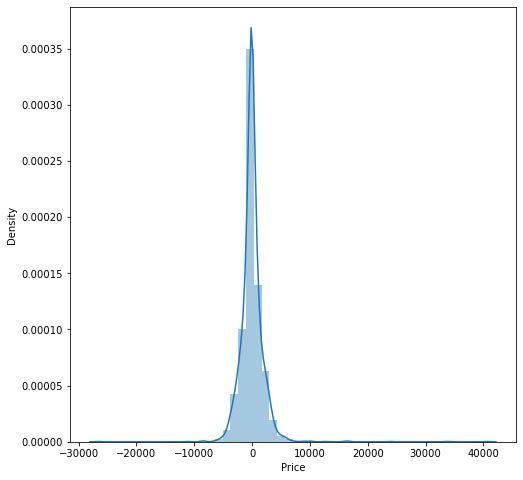

In [53]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-pred)
plt.show()

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions')

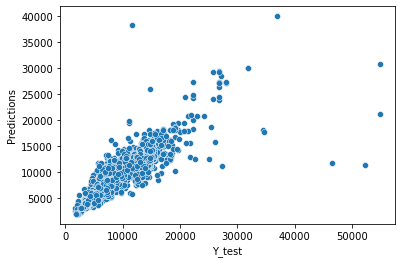

In [54]:
fig = sns.scatterplot(Y_test, pred)
fig.set_xlabel("Y_test")
fig.set_ylabel("Predictions")

In [55]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 1218.3974945963114
MSE: 4801597.802035417
RMSE: 2191.2548464374054


In [56]:
metrics.r2_score(Y_test, pred)

0.7776004924737101

## Model Serialization

In [65]:
import pickle

file = open('model.pkl','wb')
pickle.dump(random,file)

model = open('model.pkl','rb')
forest = pickle.load(model)

In [66]:
y_pred = forest.predict(X_test)
metrics.r2_score(Y_test, y_pred)

0.7776004924737101